In [1]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import plot_confusion_matrix as matrix

#Read in Data;  Class 2 for benign 4 for malignant
p = pd.read_csv('breast-cancer-wisconsin.csv')
p

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [2]:
#16 observations are missing data in the Bare Nuclei field.
missingData = p[p["Bare Nuclei"] == "?"]
missingData

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [4]:
#Replace the with ? with Numpy NaN
p = p.replace("?",np.nan)

#Cast Bare Nuclei column to Int64 and check datatypes
#p['Bare Nuclei'] = p['Bare Nuclei'].astype('Int64')
p.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
p = p[p['Bare Nuclei'].notna()]
p

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
#get labels/y values
labels = p['Class']
labels

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 683, dtype: int64

In [7]:
#get features, x values
features = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
features

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

In [8]:
#get dataframe of just features
#get all rows and just features columns
X = p.loc[:,features]
X
X.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
dtype: object

In [9]:
#setup plot
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [10]:
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

In [32]:
#set label data as Y
Y = p["Class"]
Y = Y.astype('int')
Y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 683, dtype: int32

In [12]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
#Finally, create a scorer by calling make_scorer using the score function precision_score and pass the extra parameter pos_label="donated".

#set how many folds/combinations you want
k=5
clf = tree.DecisionTreeClassifier(random_state=0)
#X is all features and Y is all labels, cv performs the split
#scores = cross_val_score(clf, X, Y, cv=k,scoring='precision_macro')
scores = cross_val_score(clf, X, Y, cv=k)

#clf = clf.fit(X, Y)

scores

array([0.91240876, 0.9270073 , 0.94890511, 0.96323529, 0.93382353])

In [13]:
#compute the mean accuracy, and the margin of error at 95% confidence interval. I.e., we are 95% confident that the mean
#accuracy is 68% +- 2 standard deviations/sqrt(k) (the more deviations the more confident we can be, widening the beam/net).
print("Accuracy = %0.2f%% (+/- %0.2f%%) @95%%" % (scores.mean()*100, (scores.std() * 1.96)/k**(1/2)*100))
scores.mean()

Accuracy = 93.71% (+/- 1.54%) @95%


0.9370759982825246

In [14]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['2', '4']

env: PYTHONBREAKPOINT=0
model score =  0.9343065693430657
Average K-Fold Score : 0.9370759982825246
[[438   6]
 [  3 236]]
model score =  0.927007299270073
Average K-Fold Score : 0.9370759982825246
[[438   6]
 [  4 235]]
model score =  0.948905109489051
Average K-Fold Score : 0.9370759982825246
[[441   3]
 [  4 235]]
model score =  0.9558823529411765
Average K-Fold Score : 0.9370759982825246
[[444   0]
 [  6 233]]
model score =  0.9485294117647058
Average K-Fold Score : 0.9370759982825246
[[440   4]
 [  3 236]]


<Figure size 1440x1440 with 0 Axes>

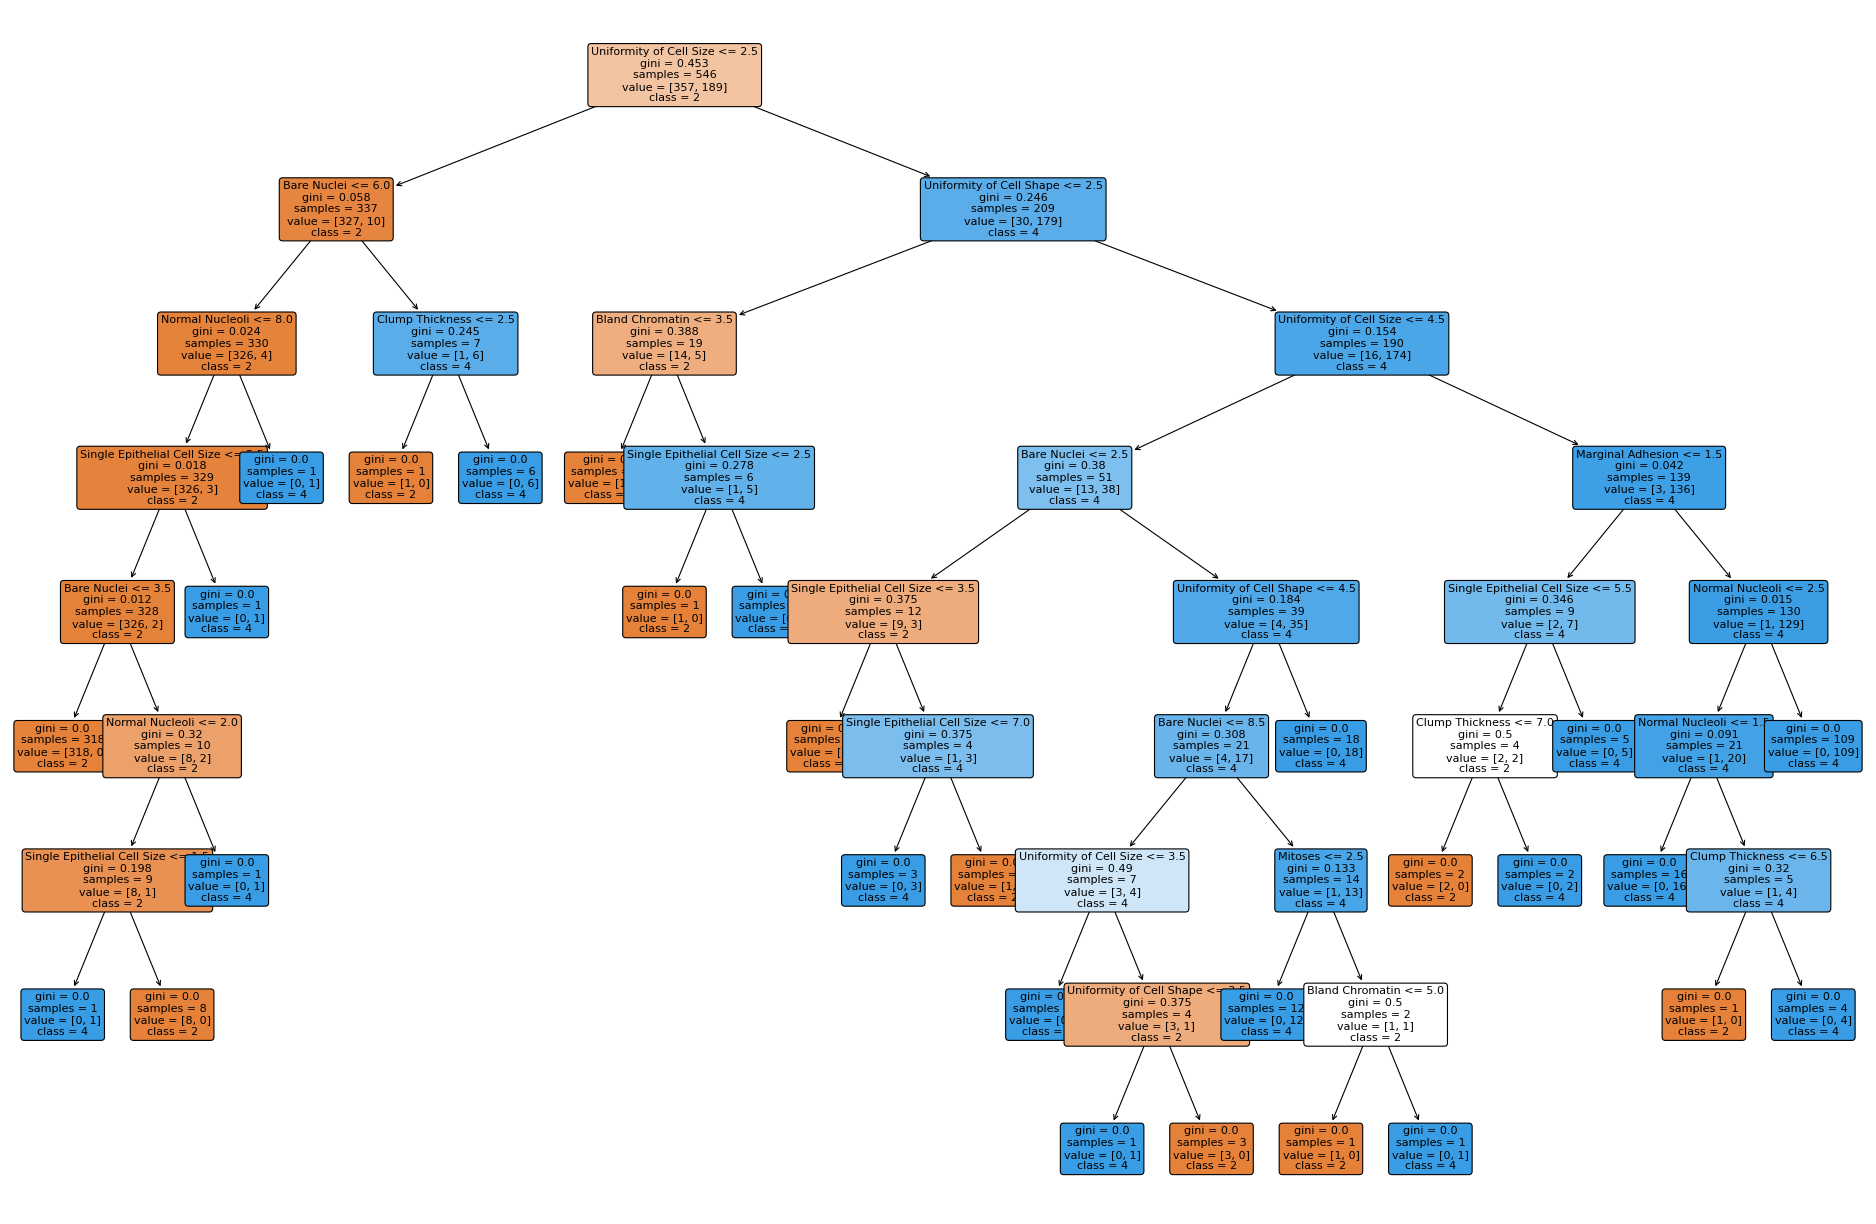

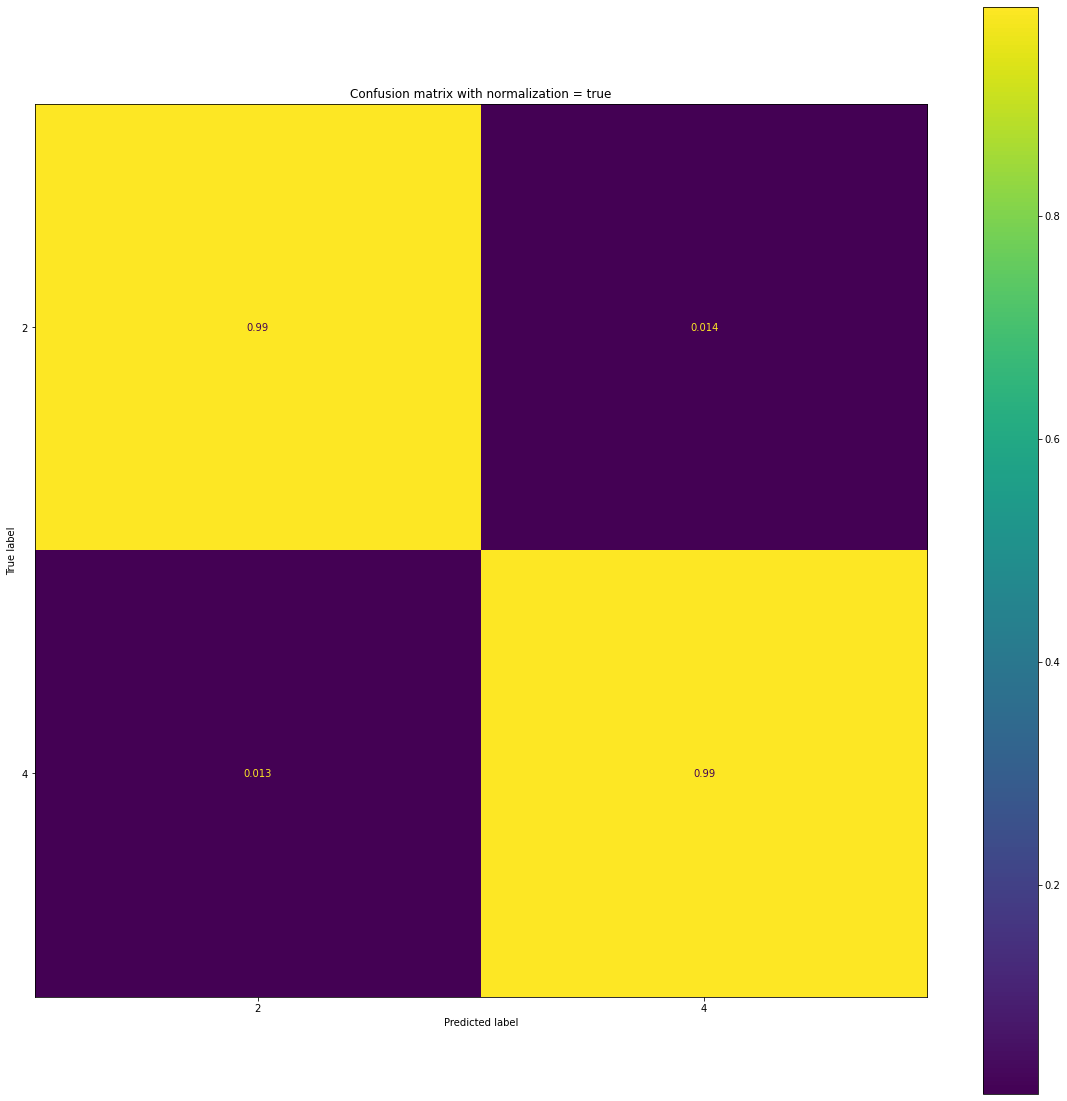

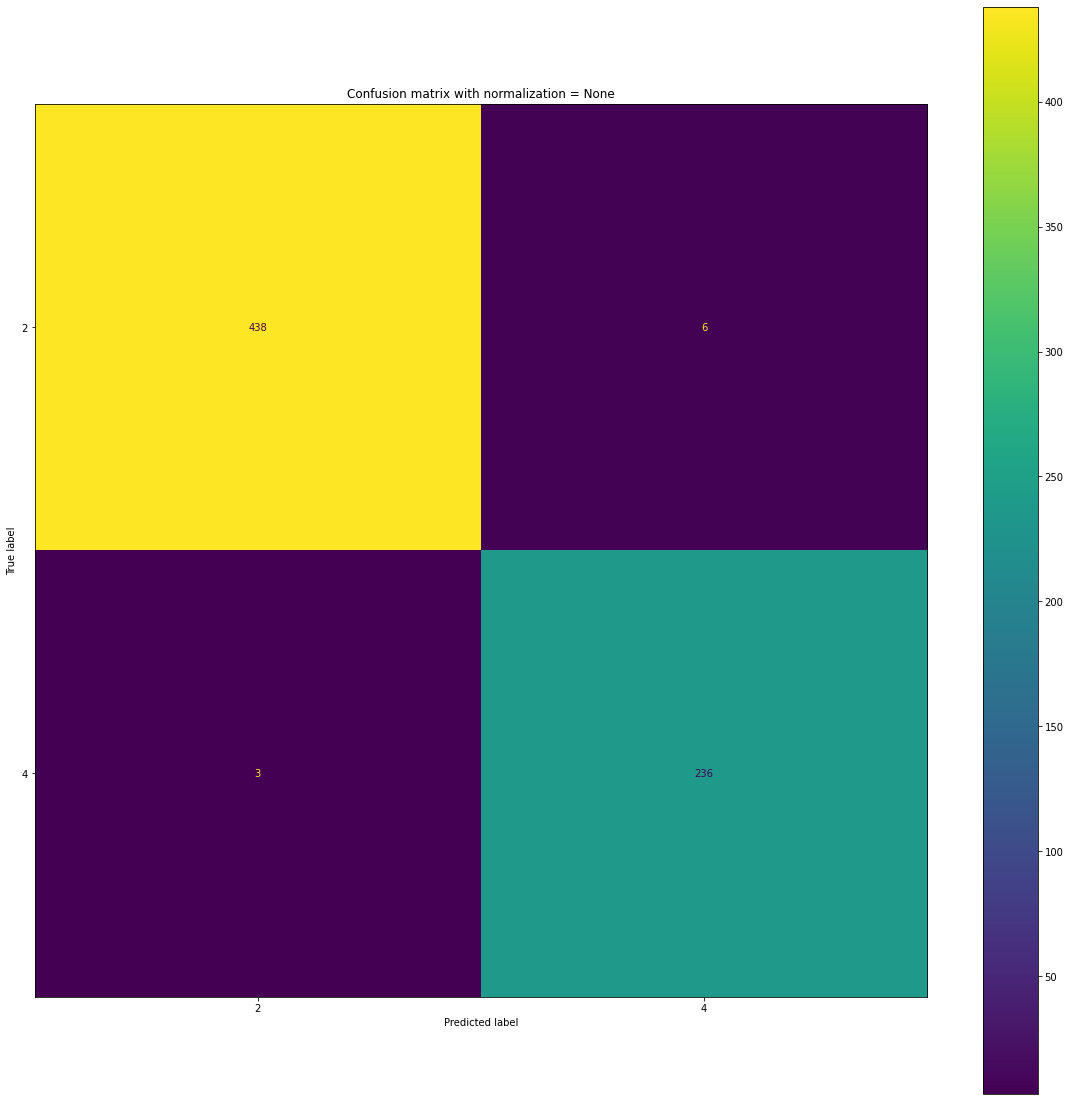

<Figure size 1440x1440 with 0 Axes>

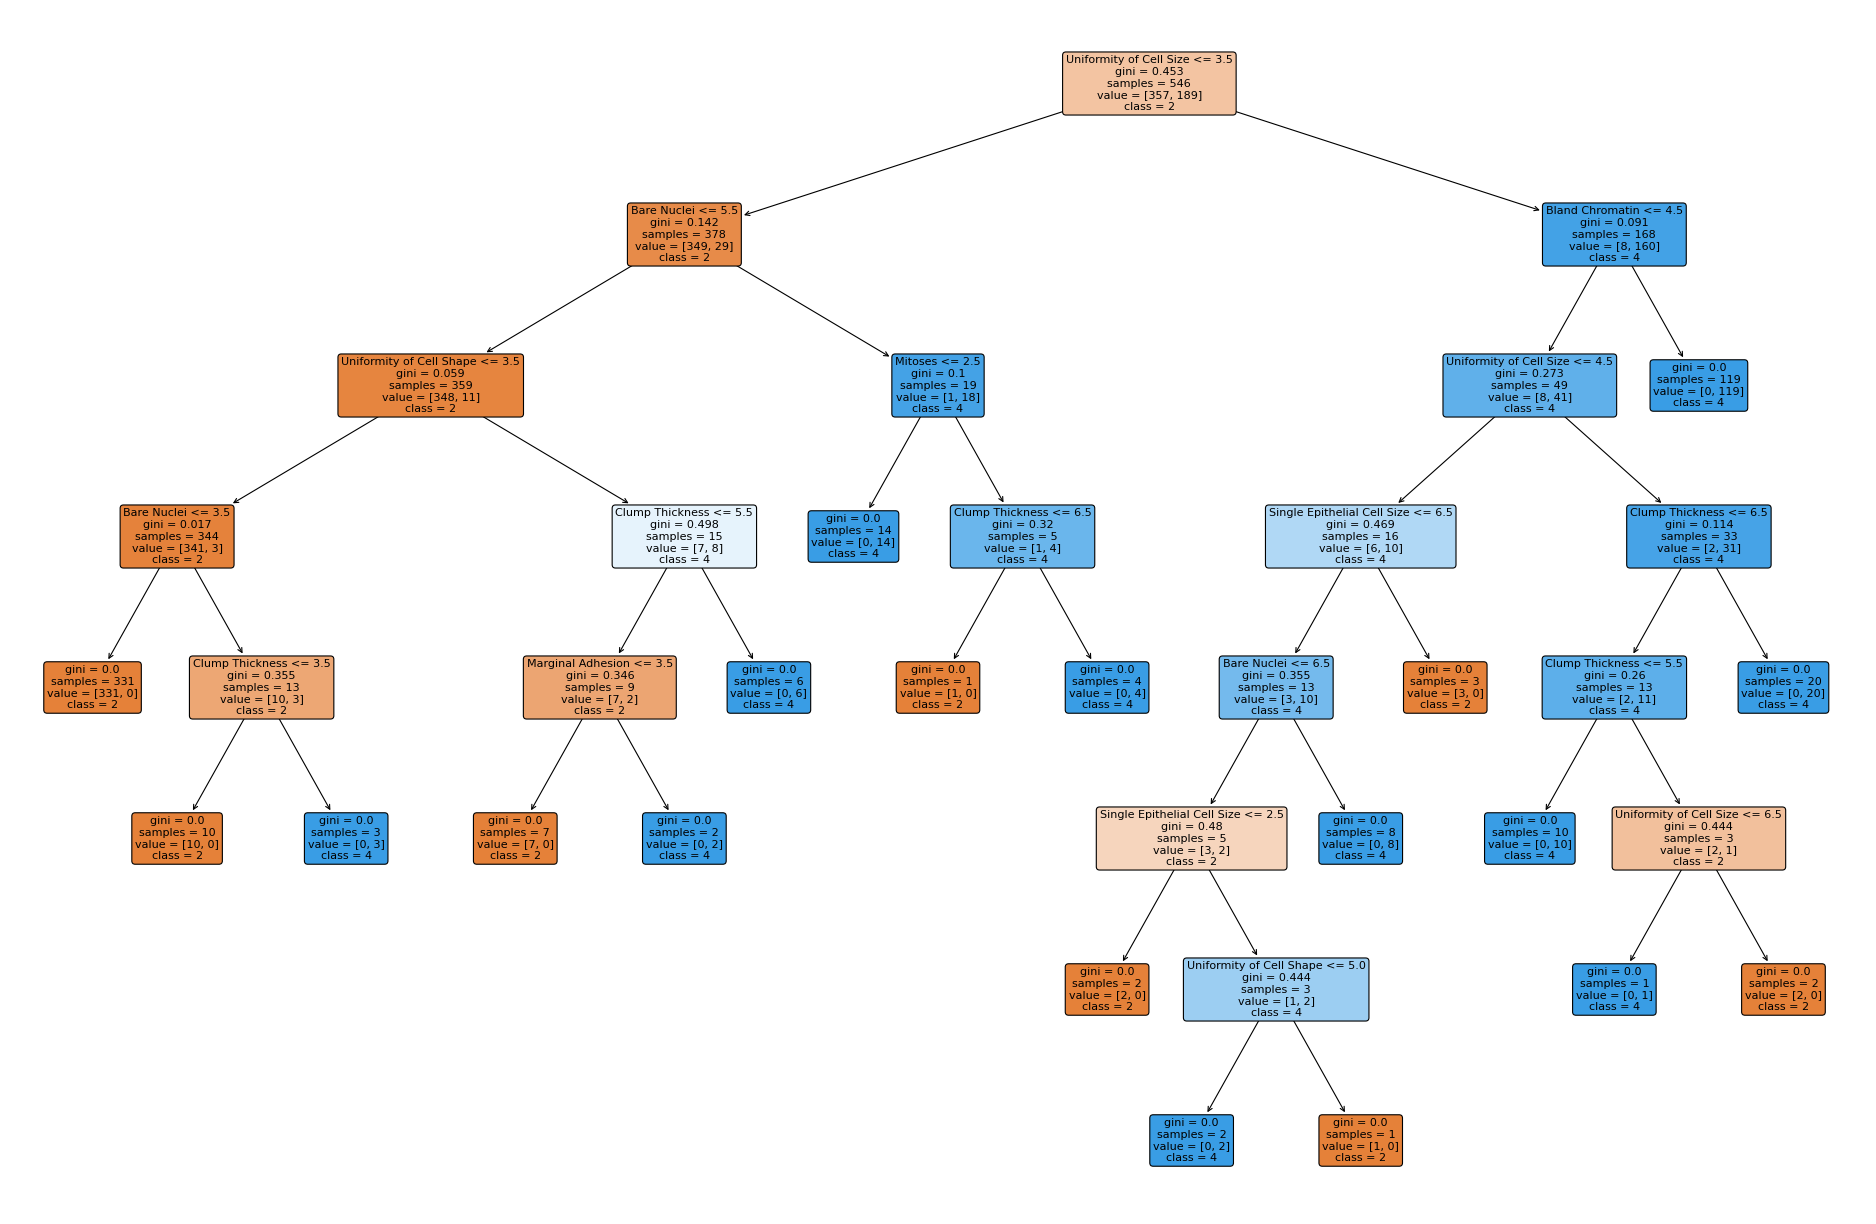

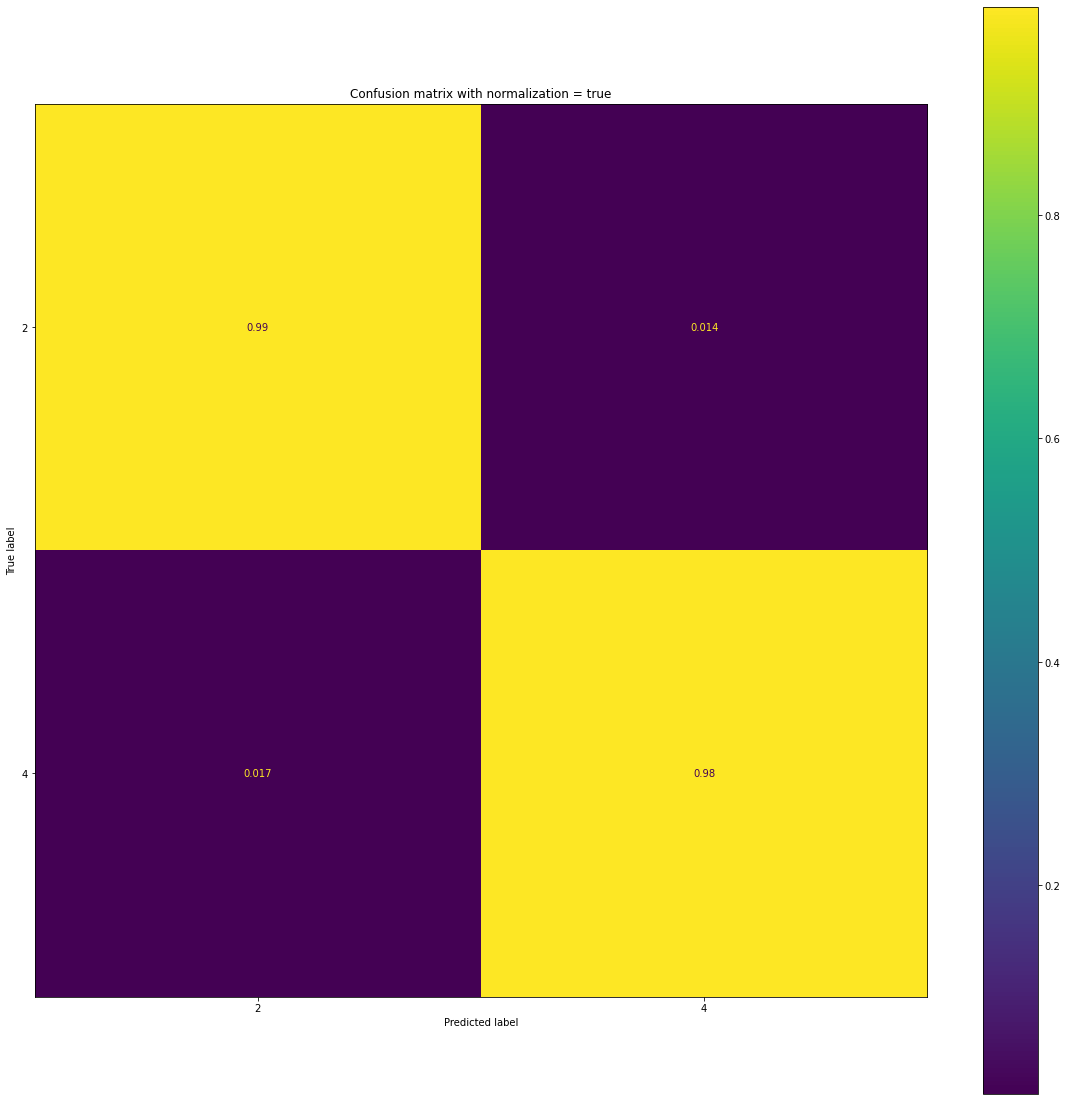

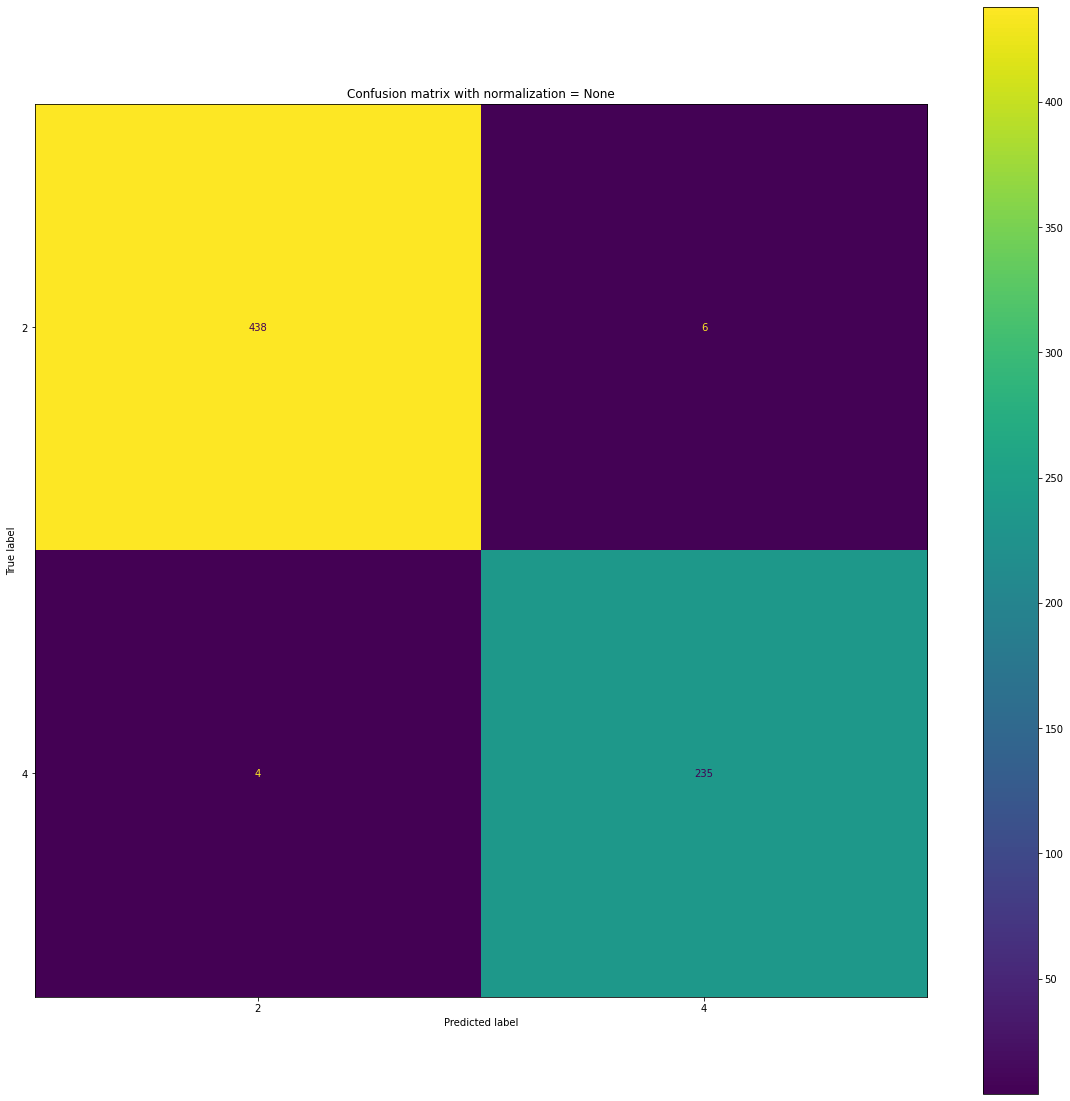

<Figure size 1440x1440 with 0 Axes>

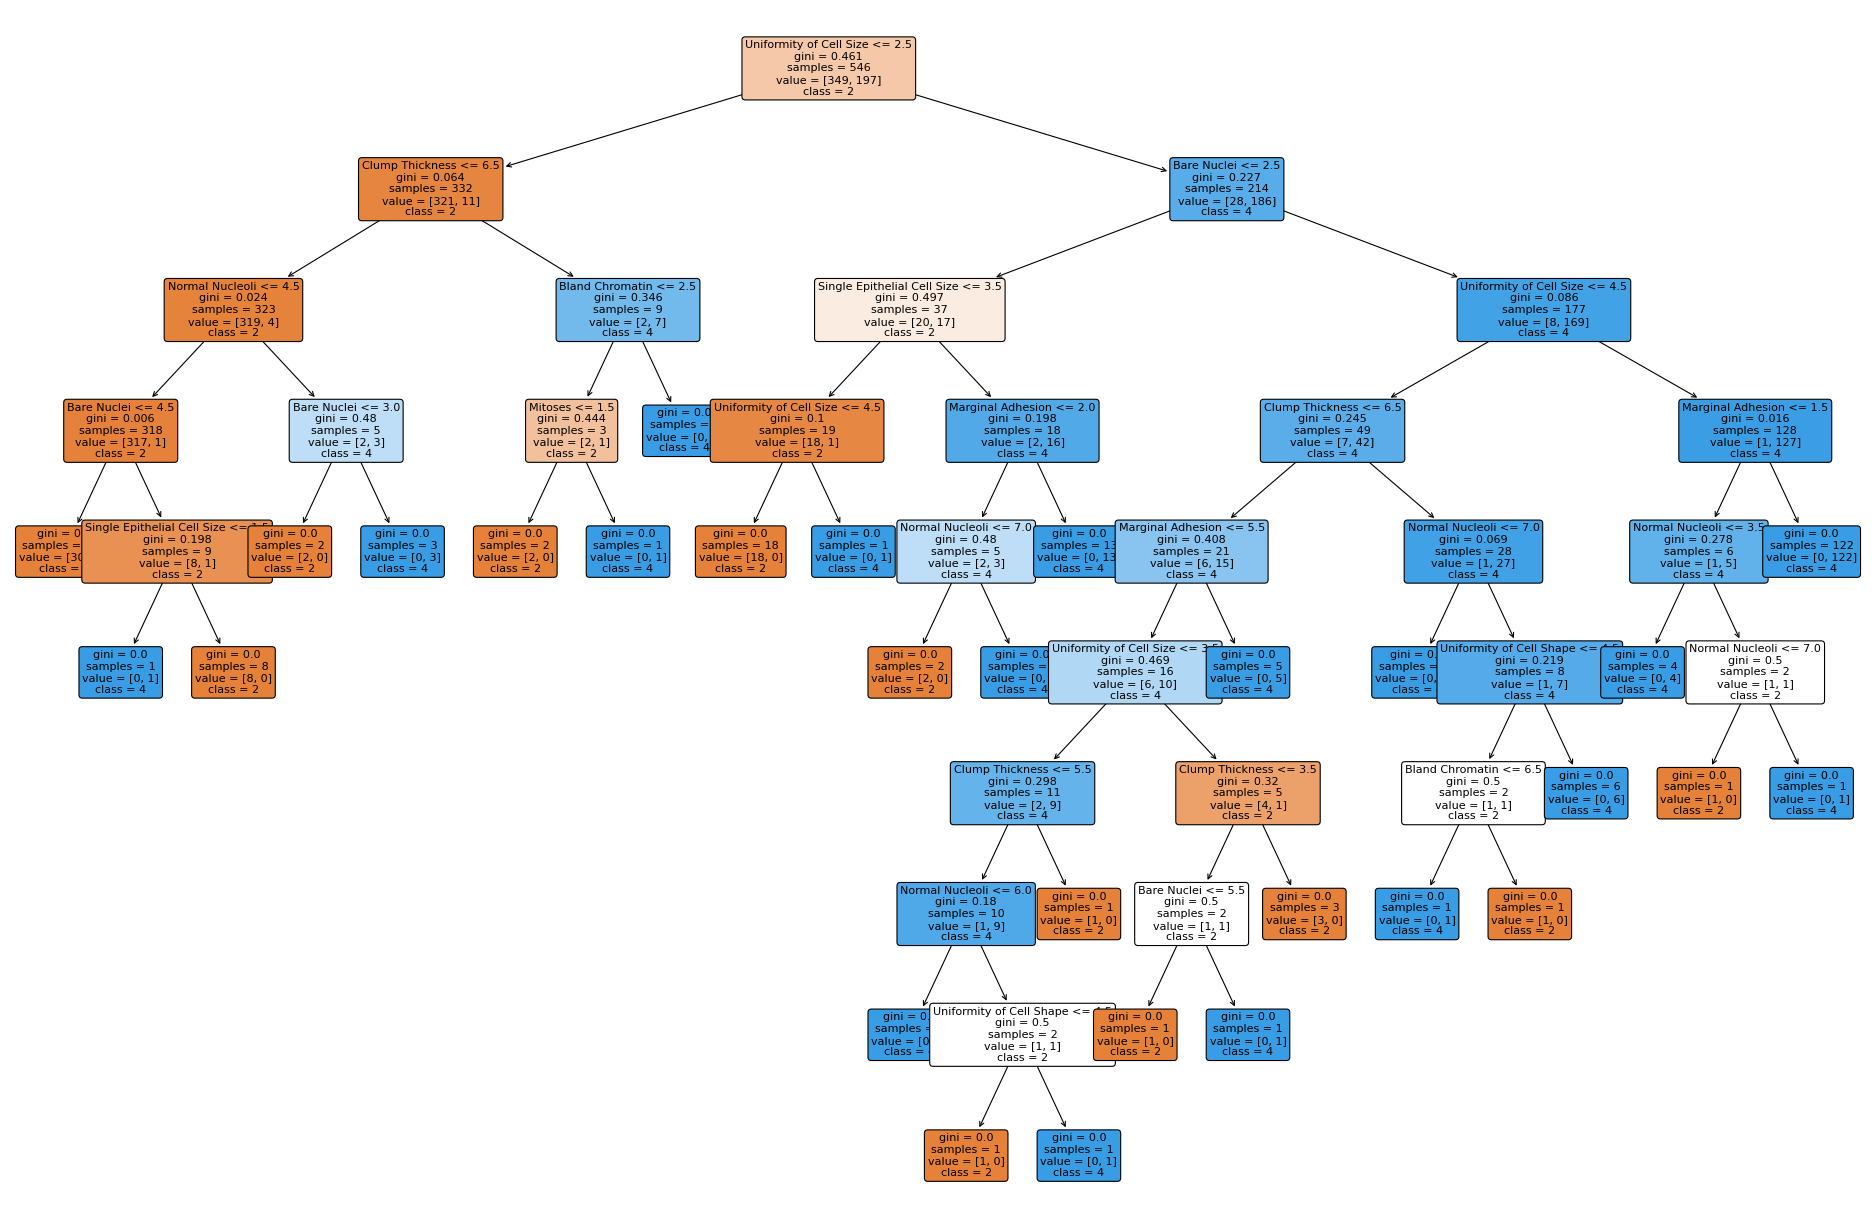

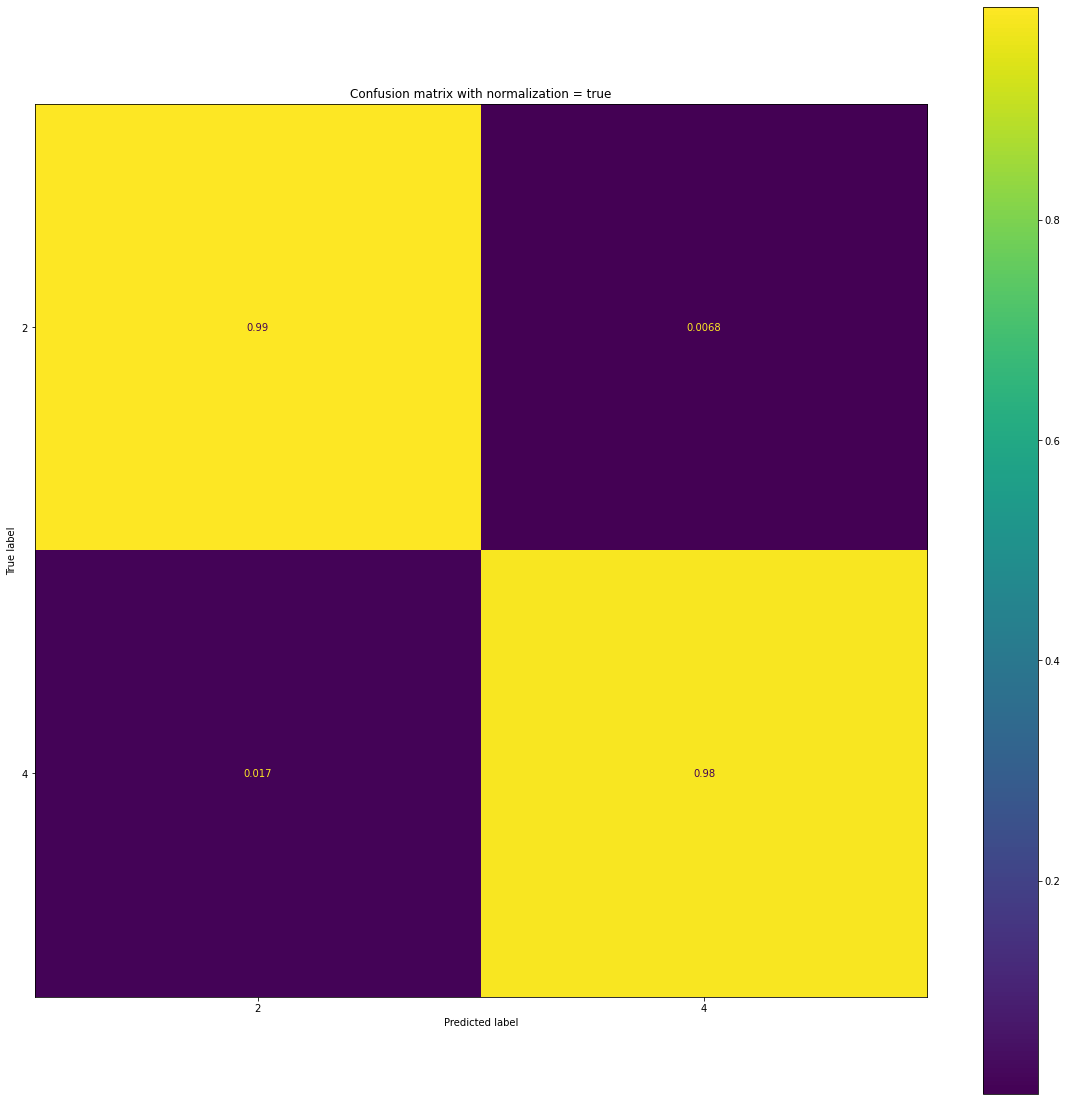

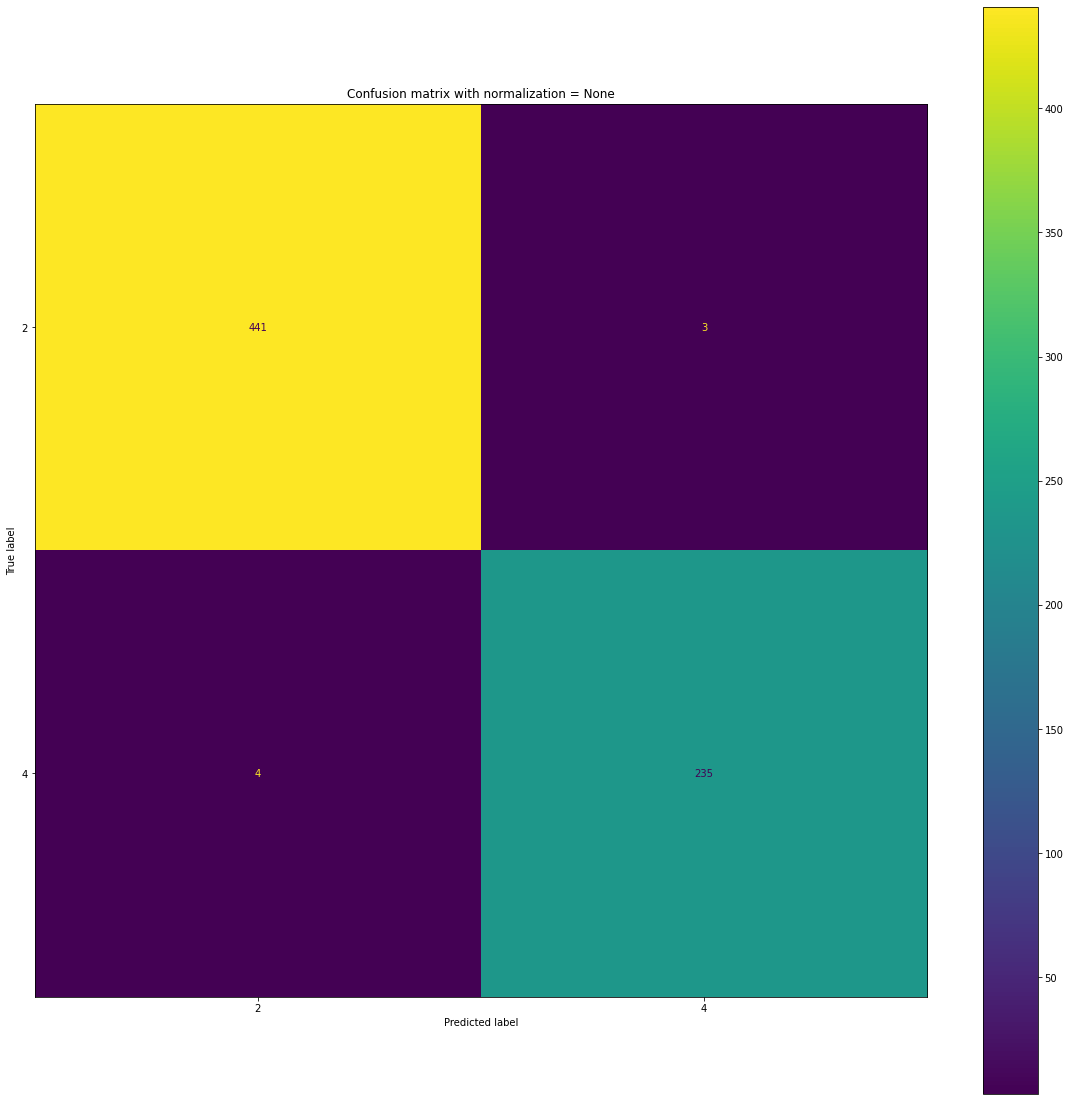

<Figure size 1440x1440 with 0 Axes>

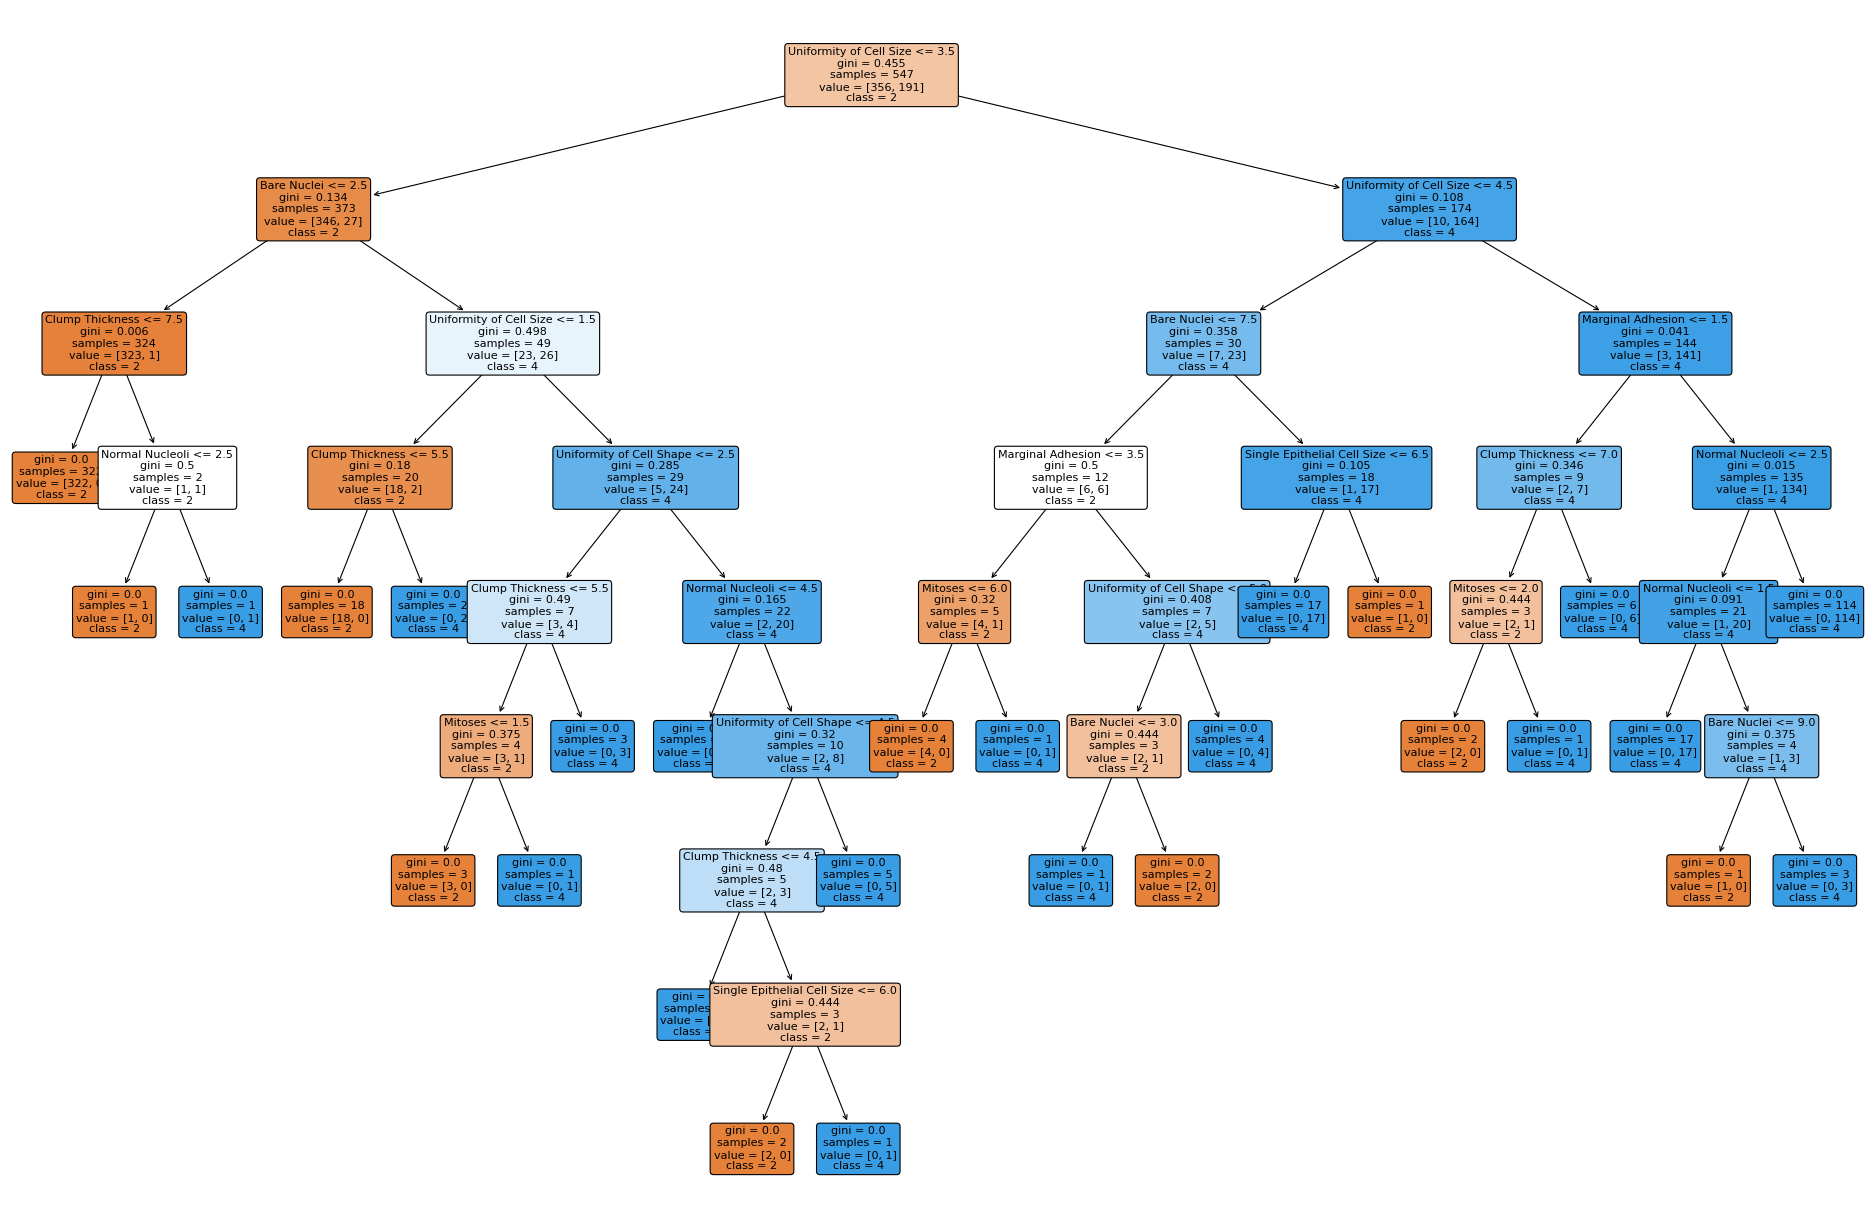

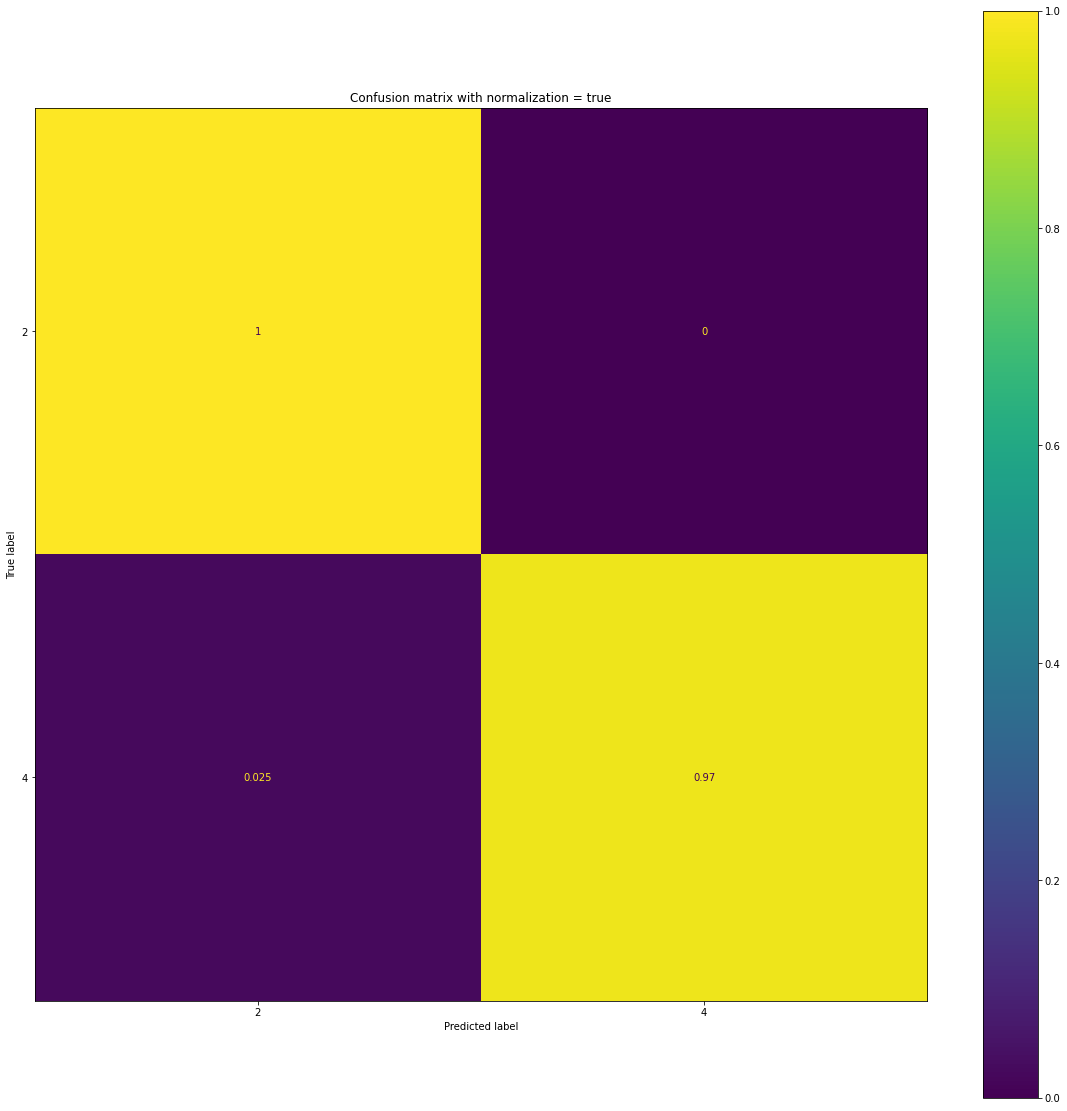

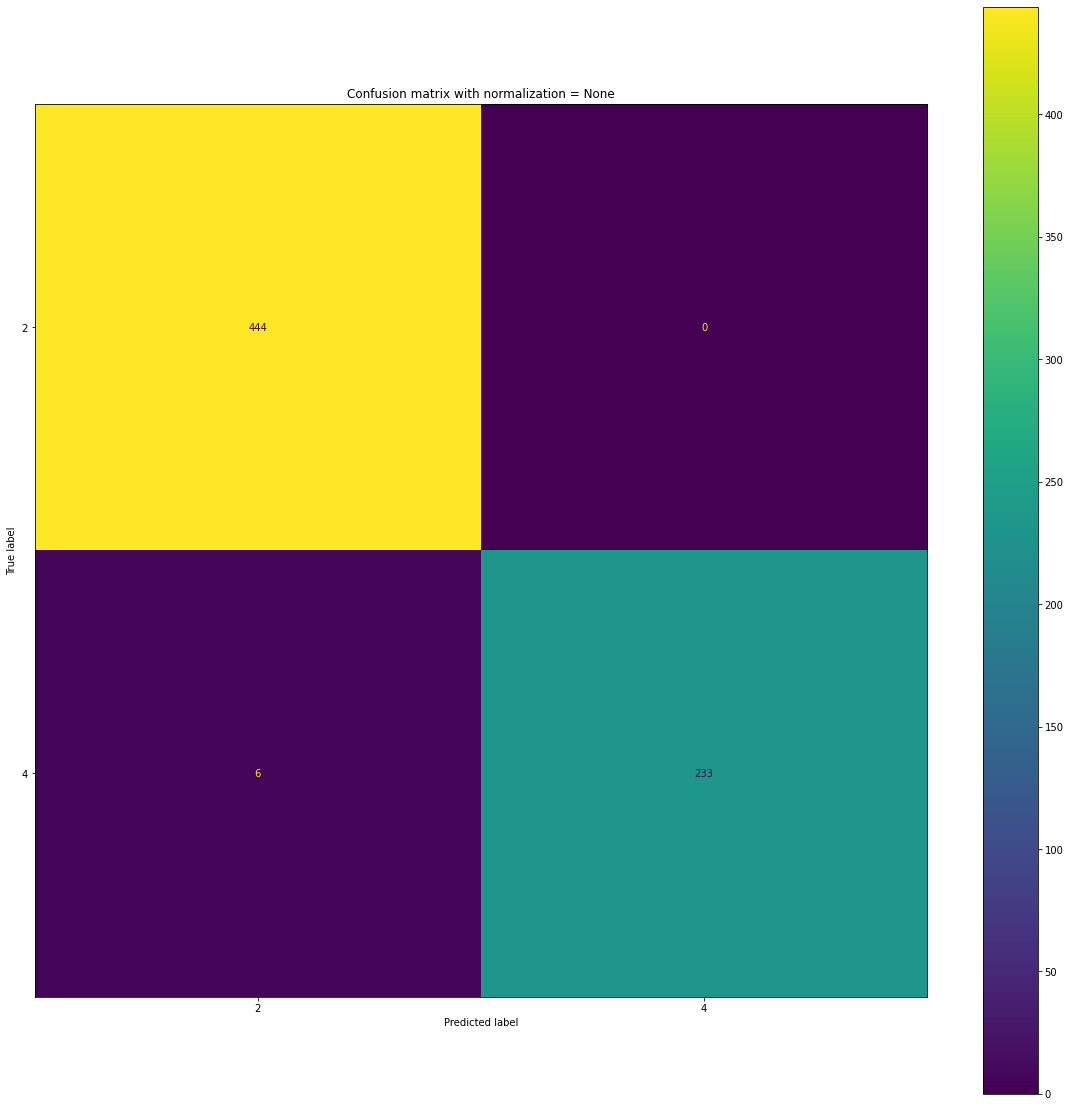

<Figure size 1440x1440 with 0 Axes>

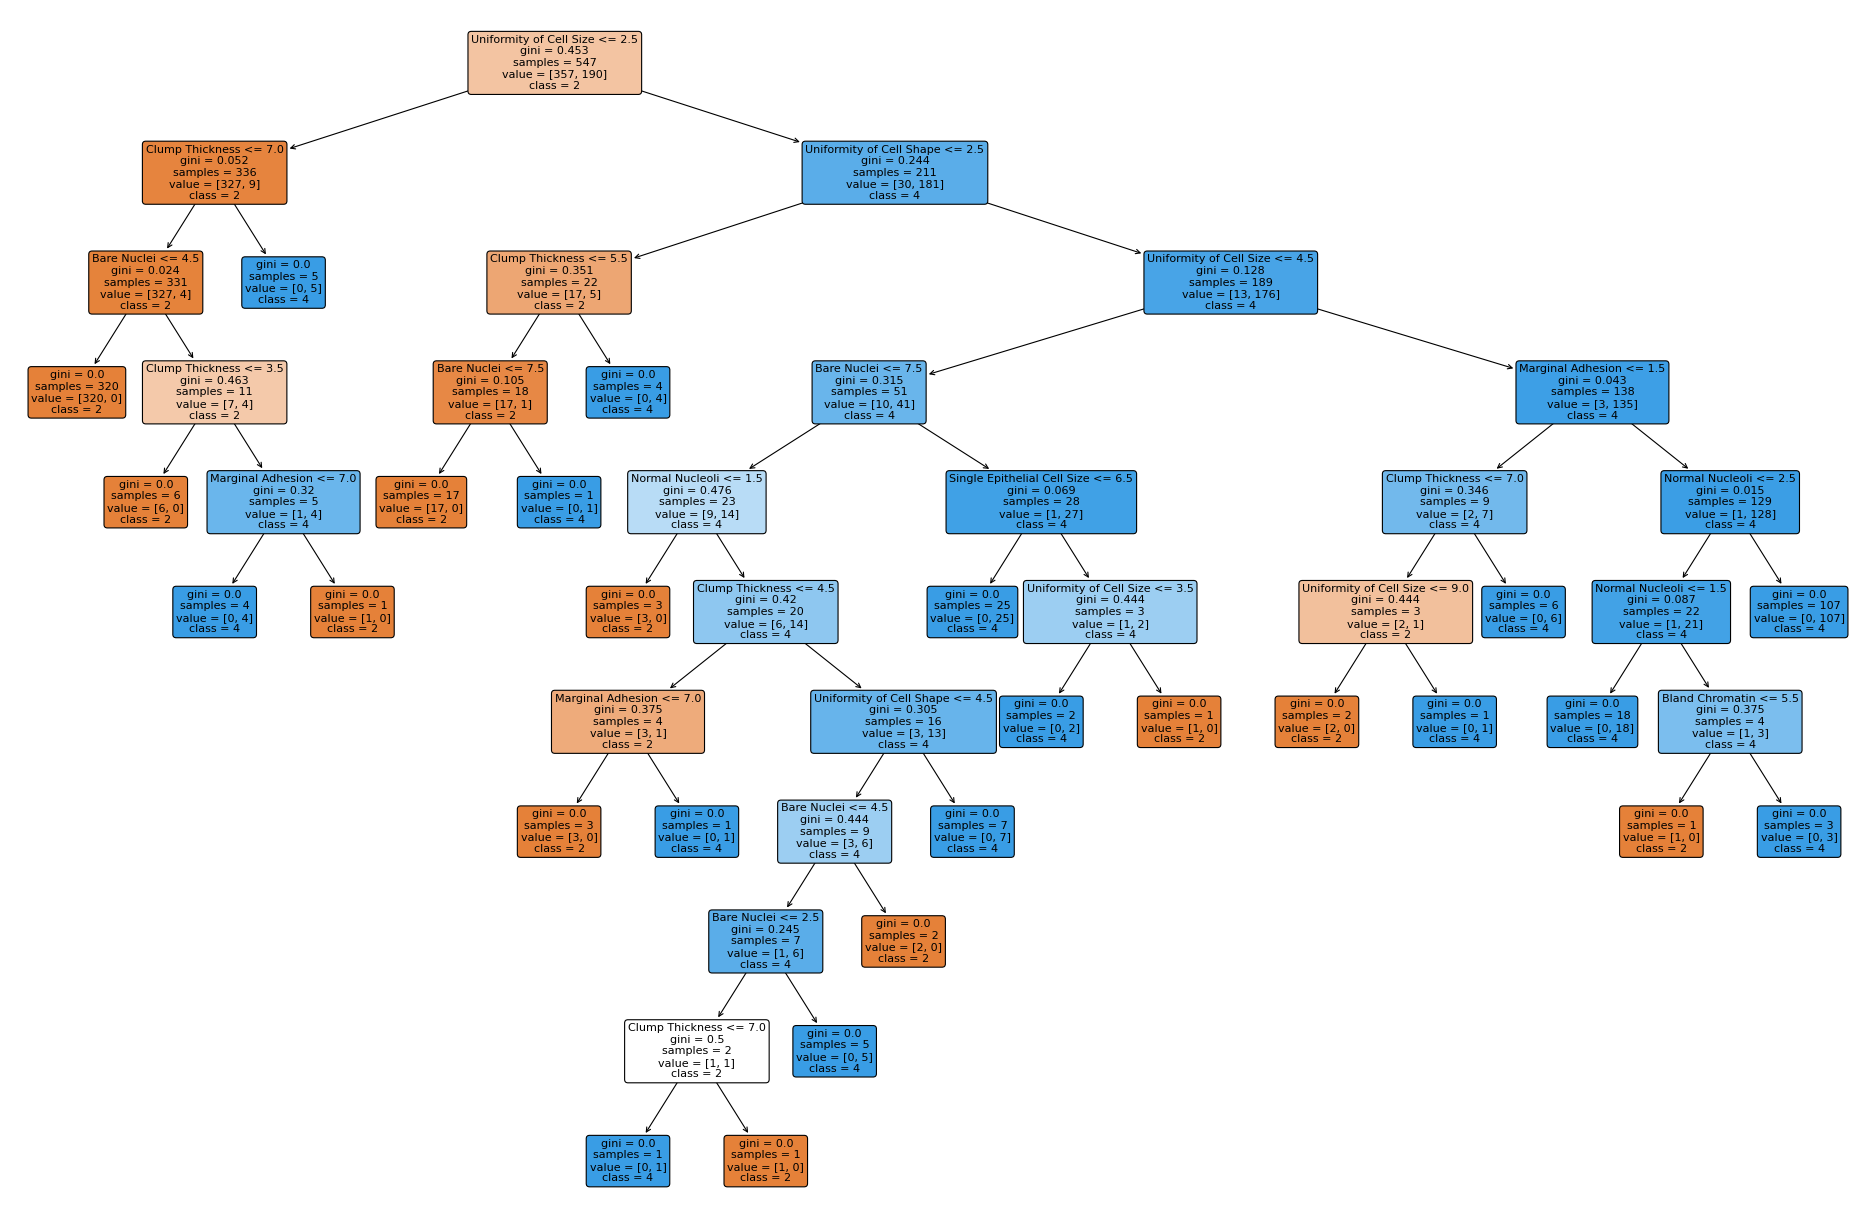

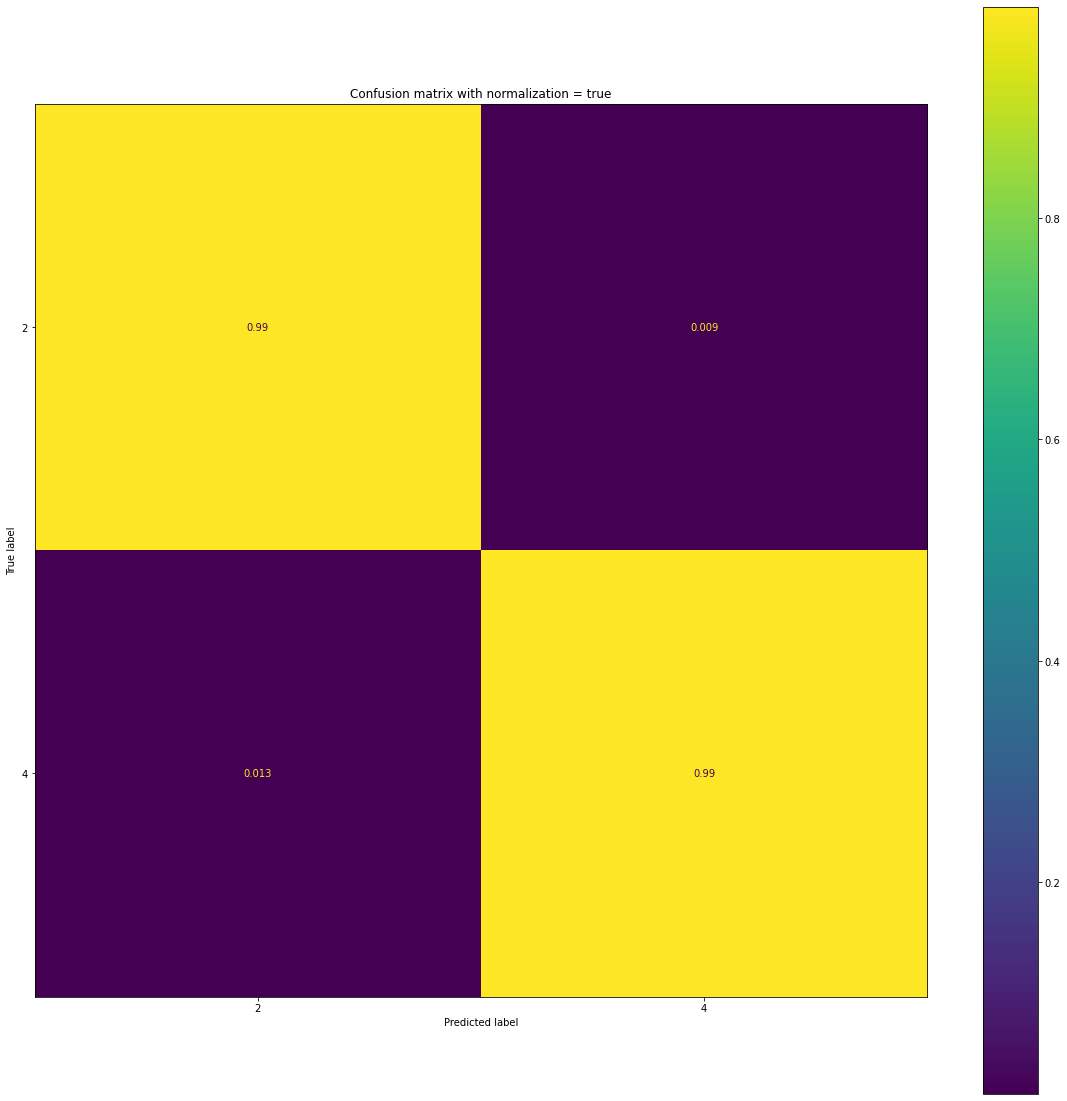

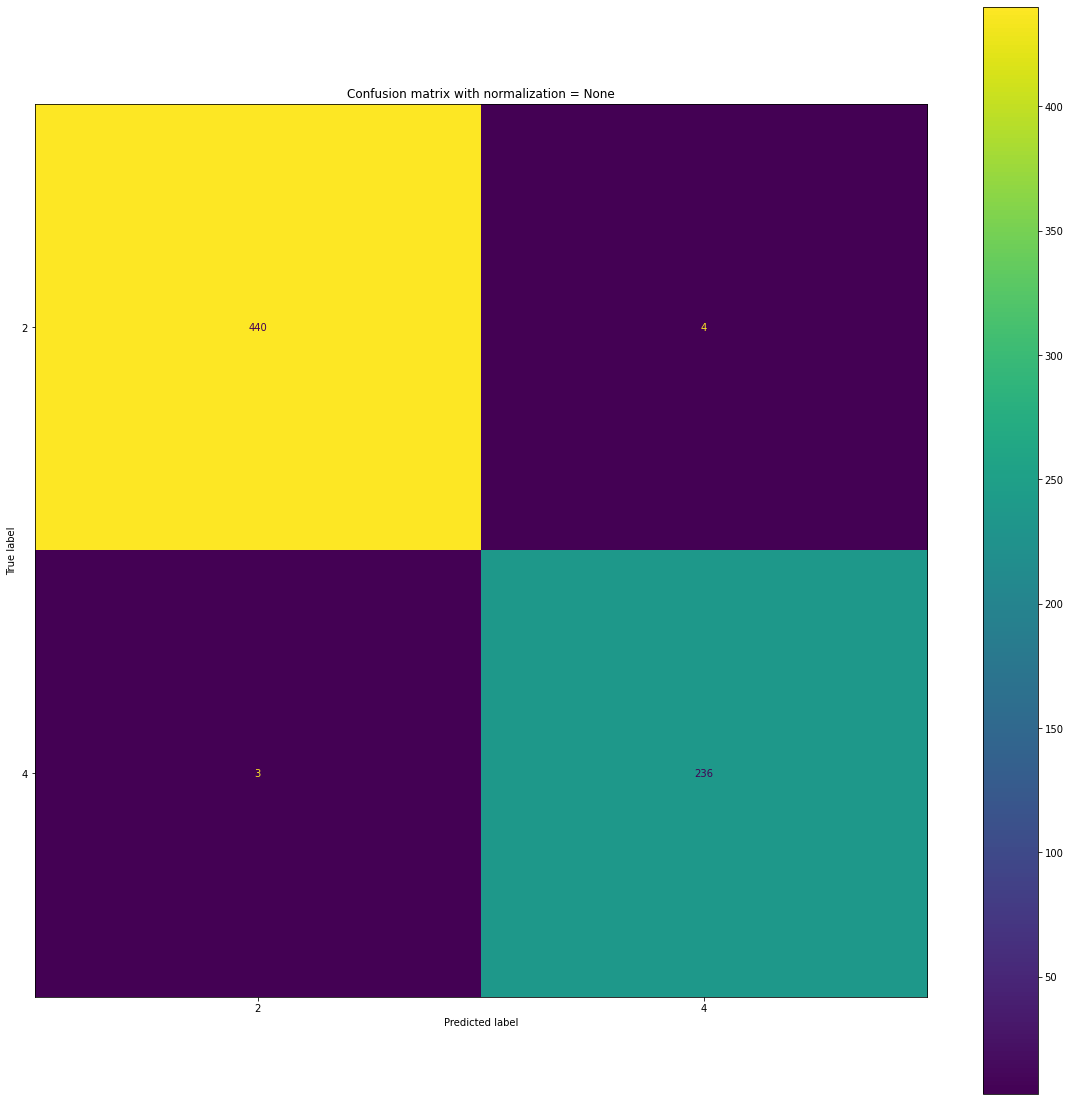

In [30]:
from pandas.plotting import scatter_matrix
%env PYTHONBREAKPOINT=0
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
#now you have to fit k models using the various splits
#after showing that there is isn't much sampling skew you can cross validate this way and choose a tree closest to the 
#mean value above or take a worst case
#note the splitting of folds occurs by randomly, use random state for reproducible results
#define a dataframe to store all the models
models = pd.DataFrame(columns=["score","model"])
breakpoint()
#loop over all possible models
from sklearn.model_selection import KFold
#shuffle reorders the data for less bias and changes the cross val score from above
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
i=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    
    #train the model
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    
    #print('Scores from each Iteration: ', scores)
    print('Average K-Fold Score :' , np.mean(scores)) 
    plt.figure()
    #x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features)
    from matplotlib.pyplot import figure
    #width,length
    figure(figsize=(30, 20), dpi=80)
    x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features,fontsize=10) 
   # plt.savefig('tree_high_dpi'+str(i), format='eps',bbox_inches = "tight")
    #assign model to dataframe
    models.loc[i] = [model.score(x_test,y_test),model]
    #clf = model
    #increment index in dataframe
    i = i+1
    
    #plot the confusion matrices 1 for normalzied the other un-normalized
    values = ['true',None]
    #cmap='cividis'
    for x in values:
        disp = matrix(clf,X,Y,display_labels=sorted,normalize=x)
        disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
    print(disp.confusion_matrix)
